In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("INR=X.csv")

In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,74.373533,74.631087,74.011048,74.358489,74.358489,0.0
std,1.417620,1.494521,1.311330,1.426245,1.426245,0.0
min,71.100403,71.279999,71.064003,71.099998,71.099998,0.0
25%,73.546175,73.706577,73.202003,73.531049,73.531049,0.0
50%,74.332001,74.531300,73.881748,74.275799,74.275799,0.0
75%,75.484551,75.737499,75.067053,75.489424,75.489424,0.0
max,77.684998,77.754997,76.496300,77.570000,77.570000,0.0


In [4]:
data.shape

(262, 7)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


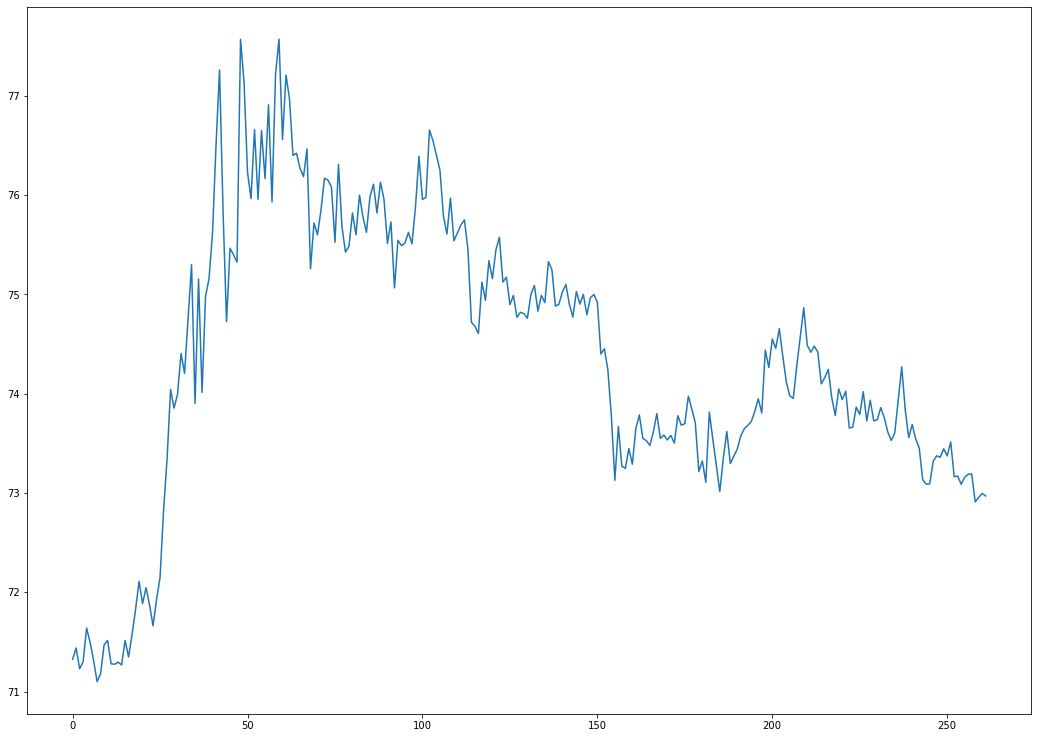

In [6]:
plt.figure(figsize=(18,13))
plt.plot(data['Close'])
plt.show()

In [8]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
257,2021-01-20,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,2021-01-21,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,2021-01-22,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,2021-01-25,72.995903,73.220001,72.877998,72.995903,72.995903,0
261,2021-01-26,72.970001,73.222000,72.774498,72.970001,72.970001,0


In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [10]:
data[data['Close'] == data['Adj Close']].shape

(262, 7)

In [11]:
data = data.drop(['Adj Close'],axis = 1)

In [12]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

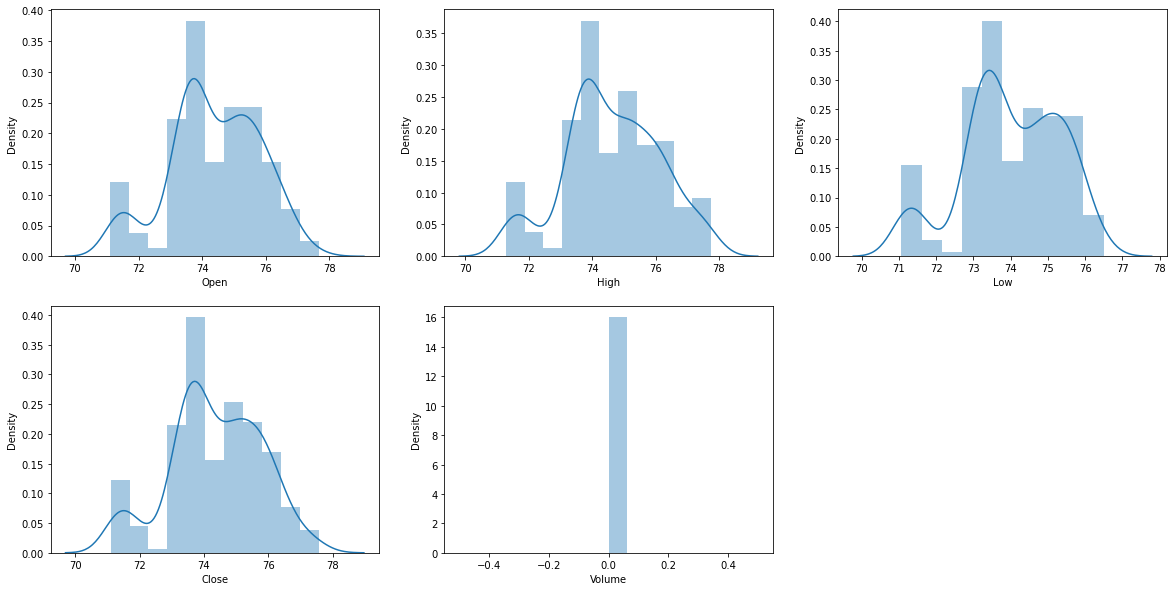

In [22]:
feature = ['Open','High','Low','Close','Volume']
plt.subplots(figsize = (20,10))
for i,col in enumerate(feature):
    plt.subplot(2,3,i+1)
    sb.distplot(data[col])
plt.show()    

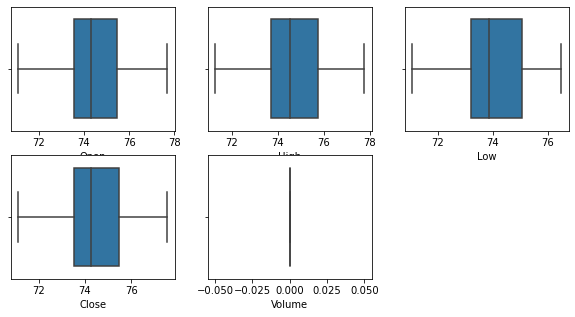

In [14]:
plt.subplots(figsize=(10,5))
for i, col in enumerate(feature):
    plt.subplot(2,3,i+1)
    sb.boxplot(data[col])
plt.show()


In [15]:
splitted = data['Date'].str.split('-', expand=True)

data['day'] = splitted[0].astype('int')
data['month'] = splitted[1].astype('int')
data['year'] = splitted[2].astype('int')

data.head()


,Date,Open,High,Low,Close,Volume,day,month,year
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,0,2020,1,27
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,0,2020,1,28
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,0,2020,1,29
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,0,2020,1,30
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,0,2020,1,31


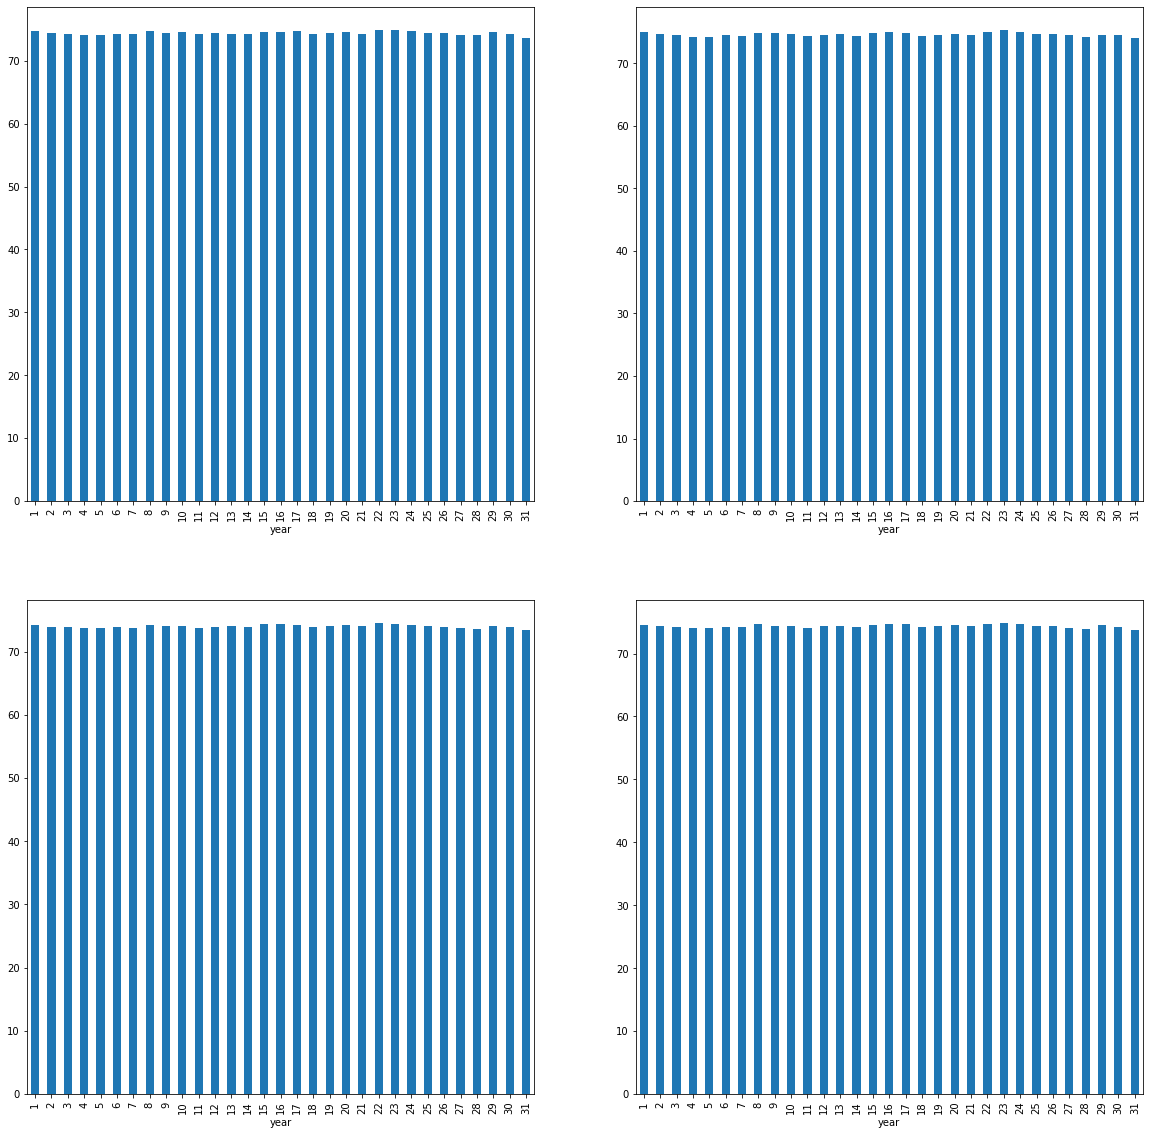

In [24]:
data_grouped = data.groupby('year').mean()
plt.subplots(figsize=(20,20))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


In [25]:
data['open-close'] = data['Open'] - data['Close']
data['low-high'] = data['Low'] - data['High']
data['target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)


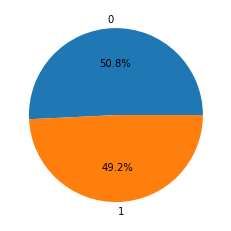

In [26]:
plt.pie(data['target'].value_counts().values,labels=[0, 1], autopct='%1.1f%%')
plt.show()


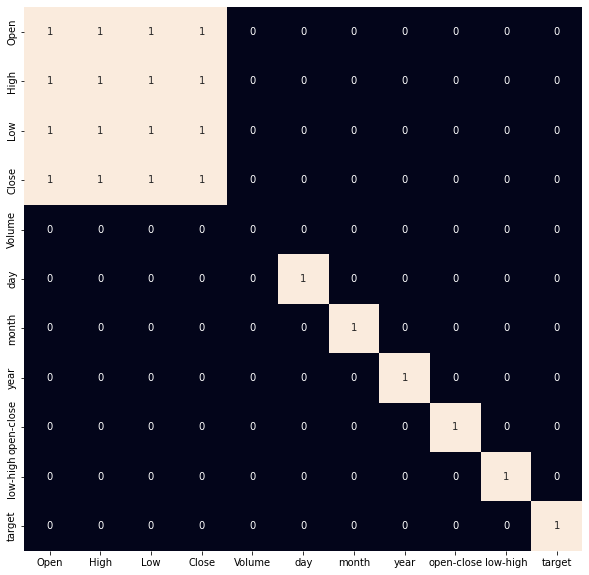

In [27]:
plt.figure(figsize=(10, 10))
sb.heatmap(data.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [28]:
feature = data[['open-close', 'low-high']]
target = data['target']

scaler = StandardScaler()
features = scaler.fit_transform(feature)

X_train, X_valid, Y_train, Y_valid = train_test_split(feature, target, test_size=0.111, random_state=75)
print(X_train.shape, X_valid.shape)


(232, 2) (30, 2)


In [36]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_valid)
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1])

In [37]:
dt = pd.DataFrame(y_pred)
dt.index +=1
dt

,0
1,1
2,0
3,0
4,1
5,1
6,0
7,1
8,0
9,0
10,0


In [42]:
# the model predict for 30 days according to date in which 16 days the stock price is higher than open price and 14 days price is less than open price
dt.value_counts()

1    16
0    14
dtype: int64

In [39]:
print(accuracy_score(Y_valid,y_pred)*100)

66.66666666666666


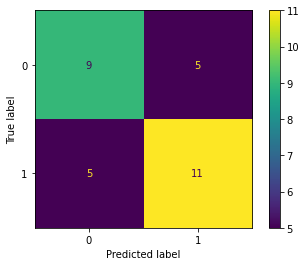

In [40]:
metrics.plot_confusion_matrix(model, X_valid, Y_valid)
plt.show()

In [41]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_valid)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1])

In [34]:
print(accuracy_score(Y_valid,y_pred)*100)

70.0
